In [2]:
import bt
import talib
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
matplotlib.use('TkAgg')
%matplotlib inline

In [5]:
# Get the price data
price_data = bt.get('goog', start='2019-11-1', end='2020-12-1')
# Calculate the RSI
stock_rsi = talib.RSI(price_data['goog']).to_frame()

In [6]:
stock_rsi

,0
Date,
2019-11-01,NaN
2019-11-04,NaN
2019-11-05,NaN
2019-11-06,NaN
2019-11-07,NaN
...,...
2020-11-24,62.781224
2020-11-25,63.102335
2020-11-27,65.812832


In [ ]:
# RSI > 70 - Short Overbought - price will fall
# RSI < 30 - Long Oversold - price will rally

In [7]:
signal = stock_rsi.copy()
signal[stock_rsi.isnull()] = 0
signal[stock_rsi < 30] = 1
signal[stock_rsi > 70] = -1
signal[(stock_rsi <= 70) & (stock_rsi >= 30)] = 0

In [8]:
signal

,0
Date,
2019-11-01,0.0
2019-11-04,0.0
2019-11-05,0.0
2019-11-06,0.0
2019-11-07,0.0
...,...
2020-11-24,0.0
2020-11-25,0.0
2020-11-27,0.0


<AxesSubplot:xlabel='Date'>

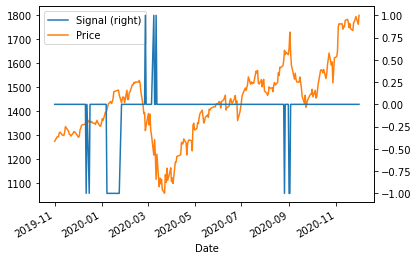

In [9]:
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['Signal', 'Price']
combined_df.plot(secondary_y = ['Signal'])

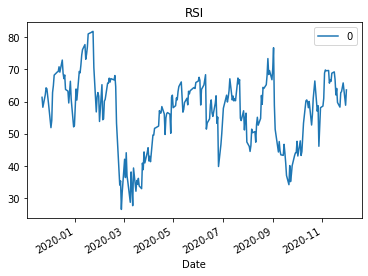

In [11]:
stock_rsi.plot()
plt.title("RSI")
plt.show()

In [13]:
signal.rename(columns = {0:'goog'}, inplace = True)
bt_strategy = bt.Strategy('RSI_MeanReversion',
                          [
                              bt.algos.WeighTarget(signal),
                              bt.algos.Rebalance()
                          ])

bt_backtest = bt.Backtest(bt_strategy,price_data)
bt_result = bt.run(bt_backtest)

<Figure size 432x288 with 0 Axes>

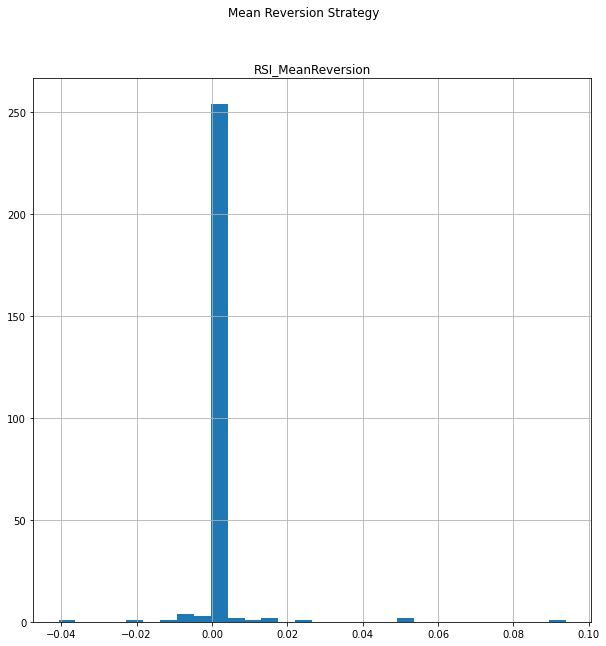

In [16]:
bt_result.plot_histograms(bins= 30, title='Mean Reversion Strategy')
plt.show()